In [2]:
# This will automatically install required packages listed if they are not found
import sys
required_packages = ['numpy', 
                     'pandas', 
                     'scipy', 
                     'matplotlib']
for package in required_packages: 
    !{sys.executable} -m pip install {package}

In [3]:
# Imports of utility-libraries , feel free to use any libraries you 
# think is appropriate, but make sure they are accessible either in pip or 
# by proper reference to open source, or for your own builds, add them to the 
# .src/ - directory. 
import pandas as pd 
from datetime import datetime
import datetime as dt 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from functools import reduce

%matplotlib inline


In [4]:
series = pd.Series('main.csv')
series = pd.Series('price.csv')
series = pd.Series('battery.csv')

In [5]:
df = pd.read_csv('main.csv')
price_df = pd.read_csv('price.csv')
battery_df =  pd.read_csv('battery.csv')

We will now split the date and time into separate colums 

In [6]:
df['Dates'] = pd.to_datetime(df['LocalDateTime']).dt.date
df['Time'] = pd.to_datetime(df['LocalDateTime']).dt.time
df

,LocalDateTime,Tagname,DataType,Value,Dates,Time
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,2020-04-07,11:49:00
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.000000,2020-04-07,11:50:00
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,2020-04-07,11:50:00
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,2020-04-07,11:50:00
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.000000,2020-04-07,11:51:00
...,...,...,...,...,...,...
164748,2020-08-19 17:36:00,HMI_Pcons,DINT,36.000000,2020-08-19,17:36:00
164749,2020-08-19 17:36:00,GD_AC_W_Sum.Value,REAL,39.168000,2020-08-19,17:36:00
164750,2020-08-19 17:36:00,PV_AC_Power.Value,REAL,6.404999,2020-08-19,17:36:00
164751,2020-08-19 17:37:00,HMI_Pcons,DINT,50.000000,2020-08-19,17:37:00


In [7]:
price_df['Dates'] = pd.to_datetime(price_df['LocalDateTime']).dt.date
price_df['Time'] = pd.to_datetime(price_df['LocalDateTime']).dt.time
price_df 

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:49:00
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.000000,53.03,2020-04-07,11:50:00
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,53.03,2020-04-07,11:50:00
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,53.03,2020-04-07,11:50:00
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.000000,53.03,2020-04-07,11:51:00
...,...,...,...,...,...,...,...
164748,2020-08-19 17:36:00,HMI_Pcons,DINT,36.000000,46.02,2020-08-19,17:36:00
164749,2020-08-19 17:36:00,GD_AC_W_Sum.Value,REAL,39.168000,46.02,2020-08-19,17:36:00
164750,2020-08-19 17:36:00,PV_AC_Power.Value,REAL,6.404999,46.02,2020-08-19,17:36:00
164751,2020-08-19 17:37:00,HMI_Pcons,DINT,50.000000,46.02,2020-08-19,17:37:00


In [8]:
battery_df['Dates'] = pd.to_datetime(battery_df['LocalDateTime']).dt.date
battery_df['Time'] = pd.to_datetime(battery_df['LocalDateTime']).dt.time
battery_df

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time
0,2020-08-19 17:37:00,500,PV_AC_Power.Value,REAL,6.255001,2020-08-19,17:37:00
1,2020-08-19 17:38:00,500,HMI_Pcons,DINT,100.000000,2020-08-19,17:38:00
2,2020-08-19 17:38:00,500,GD_AC_W_Sum.Value,REAL,41.373000,2020-08-19,17:38:00
3,2020-08-19 17:38:00,550,PV_AC_Power.Value,REAL,6.153999,2020-08-19,17:38:00
4,2020-08-19 17:39:00,500,HMI_Pcons,DINT,72.000000,2020-08-19,17:39:00
...,...,...,...,...,...,...,...
113553,2020-09-23 05:34:00,550,HMI_Pcons,DINT,25.000000,2020-09-23,05:34:00
113554,2020-09-23 05:35:00,550,GD_AC_W_Sum.Value,REAL,30.912000,2020-09-23,05:35:00
113555,2020-09-23 05:35:00,550,HMI_Pcons,DINT,33.000000,2020-09-23,05:35:00
113556,2020-09-23 05:36:00,550,GD_AC_W_Sum.Value,REAL,20.000000,2020-09-23,05:36:00


We will now identify the days of the week

In [98]:
price_df['Day'] = price_df[['Dates']].apply(lambda x: dt.datetime.strftime(x['Dates'], '%A'), axis=1)
price_df

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday,Day
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:49:00,Tuesday,Tuesday
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.000000,53.03,2020-04-07,11:50:00,Tuesday,Tuesday
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,53.03,2020-04-07,11:50:00,Tuesday,Tuesday
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,53.03,2020-04-07,11:50:00,Tuesday,Tuesday
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.000000,53.03,2020-04-07,11:51:00,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...
164748,2020-08-19 17:36:00,HMI_Pcons,DINT,36.000000,46.02,2020-08-19,17:36:00,Wednesday,Wednesday
164749,2020-08-19 17:36:00,GD_AC_W_Sum.Value,REAL,39.168000,46.02,2020-08-19,17:36:00,Wednesday,Wednesday
164750,2020-08-19 17:36:00,PV_AC_Power.Value,REAL,6.404999,46.02,2020-08-19,17:36:00,Wednesday,Wednesday
164751,2020-08-19 17:37:00,HMI_Pcons,DINT,50.000000,46.02,2020-08-19,17:37:00,Wednesday,Wednesday


In [12]:
price_df.describe()

,Value,Price
count,164753.000000,164753.000000
mean,43.044693,28.415059
std,45.730132,19.773234
min,-24.873000,2.160000
25%,14.400000,15.160000
50%,24.928000,16.580000
75%,60.000000,52.470000
max,263.232000,89.530000


Now we will plot the value of the power obtained from the grid in comparison with the price, to see if was optimally used

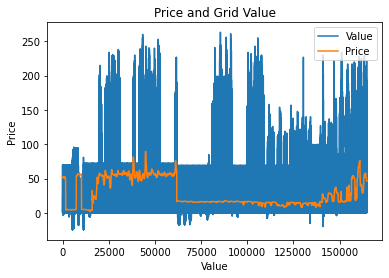

In [99]:
price_df.plot(kind='line')

plt.title('Price and Grid Value')
plt.ylabel('Price')
plt.xlabel('Value')

 # syntax: plt.text(x, y, label)
plt.show() 

as we can see it was not optimally used

In [101]:
battery_df['Day'] = battery_df[['Dates']].apply(lambda x: dt.datetime.strftime(x['Dates'], '%A'), axis=1)
battery_df

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday,Day
0,2020-08-19 17:37:00,500,PV_AC_Power.Value,REAL,6.255001,2020-08-19,17:37:00,Wednesday,Wednesday
1,2020-08-19 17:38:00,500,HMI_Pcons,DINT,100.000000,2020-08-19,17:38:00,Wednesday,Wednesday
2,2020-08-19 17:38:00,500,GD_AC_W_Sum.Value,REAL,41.373000,2020-08-19,17:38:00,Wednesday,Wednesday
3,2020-08-19 17:38:00,550,PV_AC_Power.Value,REAL,6.153999,2020-08-19,17:38:00,Wednesday,Wednesday
4,2020-08-19 17:39:00,500,HMI_Pcons,DINT,72.000000,2020-08-19,17:39:00,Wednesday,Wednesday
...,...,...,...,...,...,...,...,...,...
113553,2020-09-23 05:34:00,550,HMI_Pcons,DINT,25.000000,2020-09-23,05:34:00,Wednesday,Wednesday
113554,2020-09-23 05:35:00,550,GD_AC_W_Sum.Value,REAL,30.912000,2020-09-23,05:35:00,Wednesday,Wednesday
113555,2020-09-23 05:35:00,550,HMI_Pcons,DINT,33.000000,2020-09-23,05:35:00,Wednesday,Wednesday
113556,2020-09-23 05:36:00,550,GD_AC_W_Sum.Value,REAL,20.000000,2020-09-23,05:36:00,Wednesday,Wednesday


In [13]:
battery_df.describe()

,Milliseconds,Value
count,113558.000000,113558.000000
mean,583.196692,49.268153
std,56.775354,45.146096
min,500.000000,-29.993000
25%,550.000000,18.304000
50%,600.000000,28.000000
75%,650.000000,78.199748
max,700.000000,296.000000


Now I want to explore the fluctuations in the price and other trends in the first hour

In [11]:
df_hr = price_df.iloc[0:60]
df_hr

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:49:00,Tuesday
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.000000,53.03,2020-04-07,11:50:00,Tuesday
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,53.03,2020-04-07,11:50:00,Tuesday
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,53.03,2020-04-07,11:50:00,Tuesday
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.000000,53.03,2020-04-07,11:51:00,Tuesday
5,2020-04-07 11:51:00,GD_AC_W_Sum.Value,REAL,1.599998,53.03,2020-04-07,11:51:00,Tuesday
6,2020-04-07 11:51:00,PV_AC_Power.Value,REAL,17.719000,53.03,2020-04-07,11:51:00,Tuesday
7,2020-04-07 11:52:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:52:00,Tuesday
8,2020-04-07 11:52:00,PV_AC_Power.Value,REAL,17.583000,53.03,2020-04-07,11:52:00,Tuesday
9,2020-04-07 11:53:00,HMI_Pcons,DINT,28.000000,53.03,2020-04-07,11:53:00,Tuesday


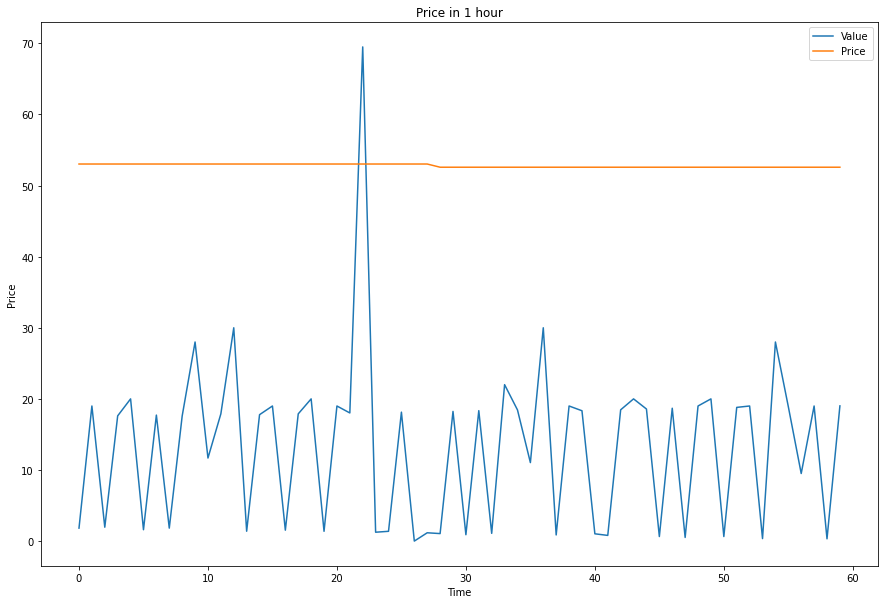

In [14]:
df_hr.plot(kind='line', figsize=(15, 10))

plt.title('Price in 1 hour')
plt.ylabel('Price')
plt.xlabel('Time')
 
# syntax: plt.text(x, y, label)
plt.show() 

As we can see, the price is almost constant but the value of the power obtained from the grid fluctuates throughout

In [16]:
Oneday_df = price_df.iloc[7615:8999, 3:9]
Oneday_df

,Value,Price,Dates,Time,weekday
7615,21.000000,53.26,2020-04-10,02:14:00,Friday
7616,20.416000,53.26,2020-04-10,02:15:00,Friday
7617,94.500000,53.26,2020-04-10,02:15:00,Friday
7618,20.000000,53.26,2020-04-10,02:15:00,Friday
7619,20.224000,53.26,2020-04-10,02:16:00,Friday
...,...,...,...,...,...
8994,-2.431999,55.73,2020-04-10,13:28:00,Friday
8995,-2.175999,55.73,2020-04-10,13:29:00,Friday
8996,-2.400002,55.73,2020-04-10,13:30:00,Friday
8997,-2.144001,55.73,2020-04-10,13:31:00,Friday


Now we will sort each type of data in a separate dataframe to analyze it better

In [23]:
grouped = price_df.groupby(df.Tagname) 
df_GD_AC = grouped.get_group("GD_AC_W_Sum.Value") 
df_GD_AC 

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:49:00,Tuesday
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,53.03,2020-04-07,11:50:00,Tuesday
5,2020-04-07 11:51:00,GD_AC_W_Sum.Value,REAL,1.599998,53.03,2020-04-07,11:51:00,Tuesday
7,2020-04-07 11:52:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:52:00,Tuesday
10,2020-04-07 11:53:00,GD_AC_W_Sum.Value,REAL,11.680000,53.03,2020-04-07,11:53:00,Tuesday
...,...,...,...,...,...,...,...,...
164740,2020-08-19 17:33:00,GD_AC_W_Sum.Value,REAL,27.648000,46.02,2020-08-19,17:33:00,Wednesday
164743,2020-08-19 17:34:00,GD_AC_W_Sum.Value,REAL,28.064000,46.02,2020-08-19,17:34:00,Wednesday
164746,2020-08-19 17:35:00,GD_AC_W_Sum.Value,REAL,32.072000,46.02,2020-08-19,17:35:00,Wednesday
164749,2020-08-19 17:36:00,GD_AC_W_Sum.Value,REAL,39.168000,46.02,2020-08-19,17:36:00,Wednesday


In [24]:
grouped = price_df.groupby(df.Tagname) 
df_PV_AC = grouped.get_group("PV_AC_Power.Value") 
df_PV_AC 

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,53.03,2020-04-07,11:50:00,Tuesday
6,2020-04-07 11:51:00,PV_AC_Power.Value,REAL,17.719000,53.03,2020-04-07,11:51:00,Tuesday
8,2020-04-07 11:52:00,PV_AC_Power.Value,REAL,17.583000,53.03,2020-04-07,11:52:00,Tuesday
11,2020-04-07 11:53:00,PV_AC_Power.Value,REAL,17.897000,53.03,2020-04-07,11:53:00,Tuesday
14,2020-04-07 11:54:00,PV_AC_Power.Value,REAL,17.778000,53.03,2020-04-07,11:54:00,Tuesday
...,...,...,...,...,...,...,...,...
164738,2020-08-19 17:32:00,PV_AC_Power.Value,REAL,7.757999,46.02,2020-08-19,17:32:00,Wednesday
164741,2020-08-19 17:33:00,PV_AC_Power.Value,REAL,8.048000,46.02,2020-08-19,17:33:00,Wednesday
164744,2020-08-19 17:34:00,PV_AC_Power.Value,REAL,7.270000,46.02,2020-08-19,17:34:00,Wednesday
164747,2020-08-19 17:35:00,PV_AC_Power.Value,REAL,6.790001,46.02,2020-08-19,17:35:00,Wednesday


In [25]:
grouped = price_df.groupby(df.Tagname) 
df_HMI = grouped.get_group("HMI_Pcons") 
df_HMI 

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.0,53.03,2020-04-07,11:50:00,Tuesday
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.0,53.03,2020-04-07,11:51:00,Tuesday
9,2020-04-07 11:53:00,HMI_Pcons,DINT,28.0,53.03,2020-04-07,11:53:00,Tuesday
12,2020-04-07 11:54:00,HMI_Pcons,DINT,30.0,53.03,2020-04-07,11:54:00,Tuesday
15,2020-04-07 11:55:00,HMI_Pcons,DINT,19.0,53.03,2020-04-07,11:55:00,Tuesday
...,...,...,...,...,...,...,...,...
164739,2020-08-19 17:33:00,HMI_Pcons,DINT,49.0,46.02,2020-08-19,17:33:00,Wednesday
164742,2020-08-19 17:34:00,HMI_Pcons,DINT,36.0,46.02,2020-08-19,17:34:00,Wednesday
164745,2020-08-19 17:35:00,HMI_Pcons,DINT,35.0,46.02,2020-08-19,17:35:00,Wednesday
164748,2020-08-19 17:36:00,HMI_Pcons,DINT,36.0,46.02,2020-08-19,17:36:00,Wednesday


In [106]:
df_GDPrice = df_GD_AC.iloc[7615:8999, 3:9]
df_GDPrice

,Value,Price,Dates,Time,weekday
16031,29.414,32.59,2020-04-13,00:00:00,Monday
16032,29.600,32.59,2020-04-13,00:01:00,Monday
16034,39.264,32.59,2020-04-13,00:02:00,Monday
16036,30.016,32.59,2020-04-13,00:03:00,Monday
16038,30.208,32.59,2020-04-13,00:04:00,Monday
...,...,...,...,...,...
19023,41.354,46.41,2020-04-13,23:55:00,Monday
19025,30.400,46.41,2020-04-13,23:56:00,Monday
19027,30.272,46.41,2020-04-13,23:57:00,Monday
19029,30.432,46.41,2020-04-13,23:58:00,Monday


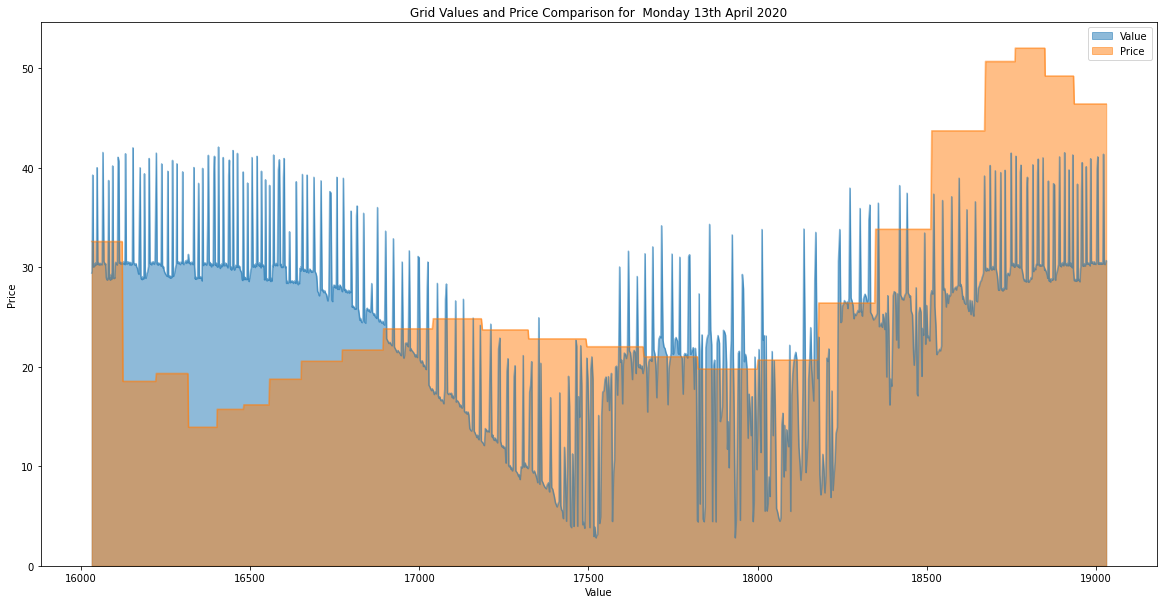

In [107]:
df_GDPrice.index = df_GDPrice.index.map(int) # let's change the index values of df_new1 to type integer for plotting
df_GDPrice.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Grid Values and Price Comparison for  Monday 13th April 2020')
plt.ylabel('Price')
plt.xlabel('Value')

plt.show()

Now I will separate the Grid AC weighted sum values and the Price for the months of April, July and August as there is no data in May and June

In [29]:
df_April_price = df_GD_AC[0:27800]
df_April_price

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
0,2020-04-07 11:49:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:49:00,Tuesday
2,2020-04-07 11:50:00,GD_AC_W_Sum.Value,REAL,1.952000,53.03,2020-04-07,11:50:00,Tuesday
5,2020-04-07 11:51:00,GD_AC_W_Sum.Value,REAL,1.599998,53.03,2020-04-07,11:51:00,Tuesday
7,2020-04-07 11:52:00,GD_AC_W_Sum.Value,REAL,1.824001,53.03,2020-04-07,11:52:00,Tuesday
10,2020-04-07 11:53:00,GD_AC_W_Sum.Value,REAL,11.680000,53.03,2020-04-07,11:53:00,Tuesday
...,...,...,...,...,...,...,...,...
61578,2020-04-27 11:08:00,GD_AC_W_Sum.Value,REAL,168.640000,62.57,2020-04-27,11:08:00,Monday
61580,2020-04-27 11:09:00,GD_AC_W_Sum.Value,REAL,171.936000,62.57,2020-04-27,11:09:00,Monday
61582,2020-04-27 11:10:00,GD_AC_W_Sum.Value,REAL,163.936000,62.57,2020-04-27,11:10:00,Monday
61585,2020-04-27 11:11:00,GD_AC_W_Sum.Value,REAL,208.667000,62.57,2020-04-27,11:11:00,Monday


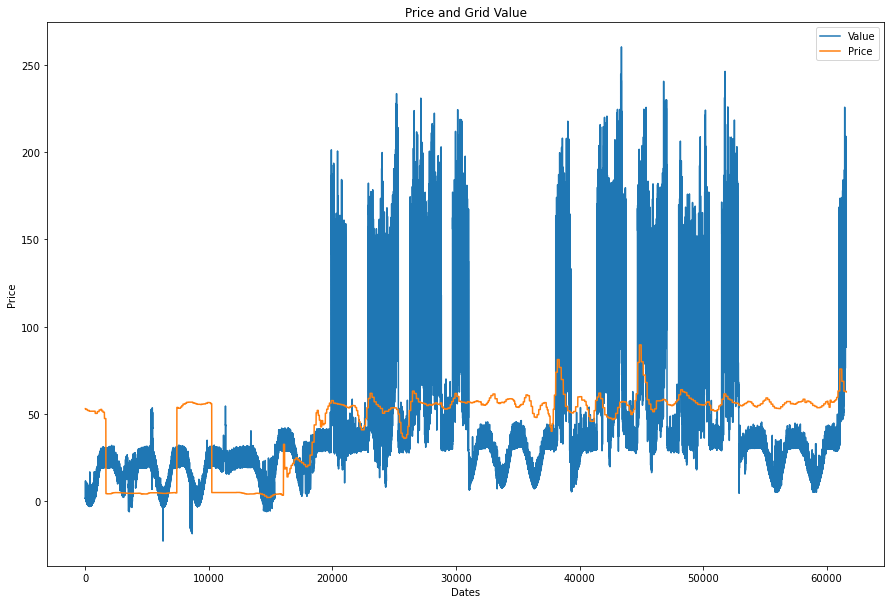

In [30]:
df_April_price.plot(kind='line', figsize=(15, 10))

plt.title('Price and Grid Value')
plt.ylabel('Price')
plt.xlabel('Dates')

# syntax: plt.text(x, y, label)
plt.show() 

In [31]:
df_July_price = df_GD_AC[27900:50729]
df_July_price

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
61848,2020-07-15 06:05:00,GD_AC_W_Sum.Value,REAL,7.007999,16.62,2020-07-15,06:05:00,Wednesday
61850,2020-07-15 06:07:00,GD_AC_W_Sum.Value,REAL,6.884998,16.62,2020-07-15,06:07:00,Wednesday
61851,2020-07-15 06:08:00,GD_AC_W_Sum.Value,REAL,7.007999,16.62,2020-07-15,06:08:00,Wednesday
61853,2020-07-15 06:09:00,GD_AC_W_Sum.Value,REAL,6.880001,16.62,2020-07-15,06:09:00,Wednesday
61855,2020-07-15 06:10:00,GD_AC_W_Sum.Value,REAL,7.011002,16.62,2020-07-15,06:10:00,Wednesday
...,...,...,...,...,...,...,...,...
115731,2020-07-31 23:55:00,GD_AC_W_Sum.Value,REAL,30.225000,13.81,2020-07-31,23:55:00,Friday
115733,2020-07-31 23:56:00,GD_AC_W_Sum.Value,REAL,19.328000,13.81,2020-07-31,23:56:00,Friday
115735,2020-07-31 23:57:00,GD_AC_W_Sum.Value,REAL,19.456000,13.81,2020-07-31,23:57:00,Friday
115736,2020-07-31 23:58:00,GD_AC_W_Sum.Value,REAL,19.264000,13.81,2020-07-31,23:58:00,Friday


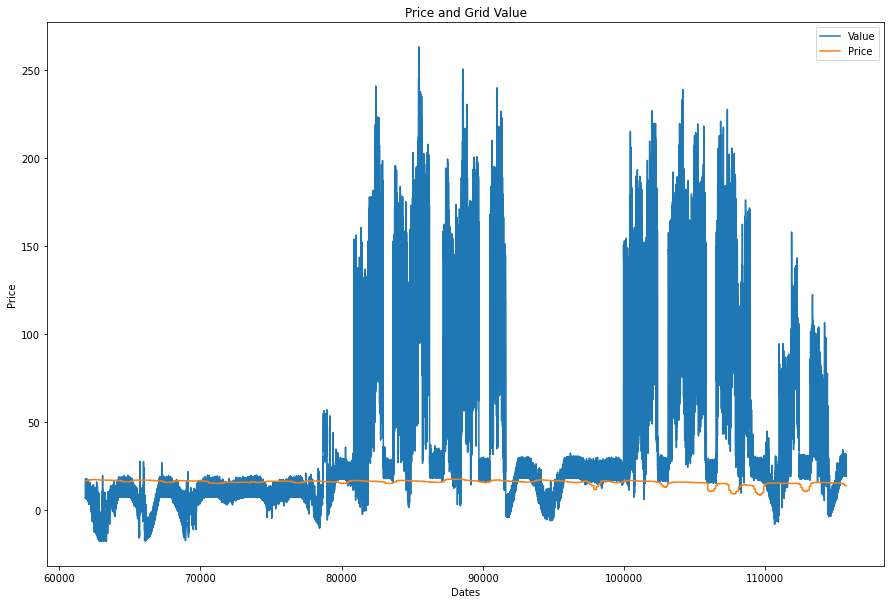

In [32]:
df_July_price.plot(kind='line', figsize=(15, 10))

plt.title('Price and Grid Value')
plt.ylabel('Price')
plt.xlabel('Dates')

# syntax: plt.text(x, y, label)
plt.show() 

In [33]:
df_August_price = df_GD_AC[50729:164752]
df_August_price

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
115741,2020-08-01 00:00:00,GD_AC_W_Sum.Value,REAL,30.24000,13.34,2020-08-01,00:00:00,Saturday
115743,2020-08-01 00:01:00,GD_AC_W_Sum.Value,REAL,19.45600,13.34,2020-08-01,00:01:00,Saturday
115744,2020-08-01 00:02:00,GD_AC_W_Sum.Value,REAL,19.23200,13.34,2020-08-01,00:02:00,Saturday
115745,2020-08-01 00:03:00,GD_AC_W_Sum.Value,REAL,19.36100,13.34,2020-08-01,00:03:00,Saturday
115747,2020-08-01 00:05:00,GD_AC_W_Sum.Value,REAL,19.51200,13.34,2020-08-01,00:05:00,Saturday
...,...,...,...,...,...,...,...,...
164740,2020-08-19 17:33:00,GD_AC_W_Sum.Value,REAL,27.64800,46.02,2020-08-19,17:33:00,Wednesday
164743,2020-08-19 17:34:00,GD_AC_W_Sum.Value,REAL,28.06400,46.02,2020-08-19,17:34:00,Wednesday
164746,2020-08-19 17:35:00,GD_AC_W_Sum.Value,REAL,32.07200,46.02,2020-08-19,17:35:00,Wednesday
164749,2020-08-19 17:36:00,GD_AC_W_Sum.Value,REAL,39.16800,46.02,2020-08-19,17:36:00,Wednesday


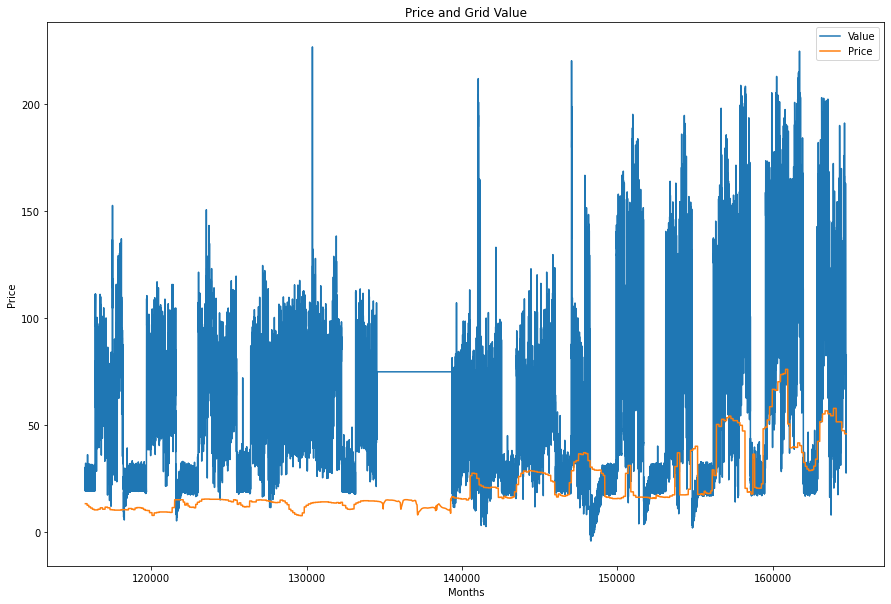

In [109]:
df_August_price.plot(kind='line', figsize=(15, 10))

plt.title('Price and Grid Value')
plt.ylabel('Price')
plt.xlabel('Months')

# syntax: plt.text(x, y, label)
plt.show() 

The flat straight line in blue above shows how there is no data for the middle months

In [35]:
df_April_HMI = df_HMI[0:21537]
df_April_HMI

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
1,2020-04-07 11:50:00,HMI_Pcons,DINT,19.0,53.03,2020-04-07,11:50:00,Tuesday
4,2020-04-07 11:51:00,HMI_Pcons,DINT,20.0,53.03,2020-04-07,11:51:00,Tuesday
9,2020-04-07 11:53:00,HMI_Pcons,DINT,28.0,53.03,2020-04-07,11:53:00,Tuesday
12,2020-04-07 11:54:00,HMI_Pcons,DINT,30.0,53.03,2020-04-07,11:54:00,Tuesday
15,2020-04-07 11:55:00,HMI_Pcons,DINT,19.0,53.03,2020-04-07,11:55:00,Tuesday
...,...,...,...,...,...,...,...,...
61788,2020-04-27 12:22:00,HMI_Pcons,DINT,67.0,61.99,2020-04-27,12:22:00,Monday
61791,2020-04-27 12:23:00,HMI_Pcons,DINT,57.0,61.99,2020-04-27,12:23:00,Monday
61794,2020-04-27 12:24:00,HMI_Pcons,DINT,134.0,61.99,2020-04-27,12:24:00,Monday
61797,2020-04-27 12:25:00,HMI_Pcons,DINT,127.0,61.99,2020-04-27,12:25:00,Monday


In [37]:
df_july_HMI = df_HMI[21537:40591]
df_july_HMI

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
61811,2020-07-15 05:42:00,HMI_Pcons,DINT,11.0,16.30,2020-07-15,05:42:00,Wednesday
61813,2020-07-15 05:43:00,HMI_Pcons,DINT,18.0,16.30,2020-07-15,05:43:00,Wednesday
61815,2020-07-15 05:44:00,HMI_Pcons,DINT,7.0,16.30,2020-07-15,05:44:00,Wednesday
61816,2020-07-15 05:45:00,HMI_Pcons,DINT,8.0,16.30,2020-07-15,05:45:00,Wednesday
61818,2020-07-15 05:46:00,HMI_Pcons,DINT,7.0,16.30,2020-07-15,05:46:00,Wednesday
...,...,...,...,...,...,...,...,...
115730,2020-07-31 23:54:00,HMI_Pcons,DINT,20.0,13.81,2020-07-31,23:54:00,Friday
115732,2020-07-31 23:55:00,HMI_Pcons,DINT,30.0,13.81,2020-07-31,23:55:00,Friday
115734,2020-07-31 23:56:00,HMI_Pcons,DINT,19.0,13.81,2020-07-31,23:56:00,Friday
115737,2020-07-31 23:58:00,HMI_Pcons,DINT,20.0,13.81,2020-07-31,23:58:00,Friday


In [38]:
df_aug_HMI = df_HMI[40591:164751]
df_aug_HMI

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
115740,2020-08-01 00:00:00,HMI_Pcons,DINT,30.0,13.34,2020-08-01,00:00:00,Saturday
115742,2020-08-01 00:01:00,HMI_Pcons,DINT,19.0,13.34,2020-08-01,00:01:00,Saturday
115746,2020-08-01 00:04:00,HMI_Pcons,DINT,20.0,13.34,2020-08-01,00:04:00,Saturday
115748,2020-08-01 00:05:00,HMI_Pcons,DINT,30.0,13.34,2020-08-01,00:05:00,Saturday
115750,2020-08-01 00:06:00,HMI_Pcons,DINT,23.0,13.34,2020-08-01,00:06:00,Saturday
...,...,...,...,...,...,...,...,...
164739,2020-08-19 17:33:00,HMI_Pcons,DINT,49.0,46.02,2020-08-19,17:33:00,Wednesday
164742,2020-08-19 17:34:00,HMI_Pcons,DINT,36.0,46.02,2020-08-19,17:34:00,Wednesday
164745,2020-08-19 17:35:00,HMI_Pcons,DINT,35.0,46.02,2020-08-19,17:35:00,Wednesday
164748,2020-08-19 17:36:00,HMI_Pcons,DINT,36.0,46.02,2020-08-19,17:36:00,Wednesday


In [39]:
df_April_pv_ac = df_PV_AC[0:11169]
df_April_pv_ac

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
3,2020-04-07 11:50:00,PV_AC_Power.Value,REAL,17.614000,53.03,2020-04-07,11:50:00,Tuesday
6,2020-04-07 11:51:00,PV_AC_Power.Value,REAL,17.719000,53.03,2020-04-07,11:51:00,Tuesday
8,2020-04-07 11:52:00,PV_AC_Power.Value,REAL,17.583000,53.03,2020-04-07,11:52:00,Tuesday
11,2020-04-07 11:53:00,PV_AC_Power.Value,REAL,17.897000,53.03,2020-04-07,11:53:00,Tuesday
14,2020-04-07 11:54:00,PV_AC_Power.Value,REAL,17.778000,53.03,2020-04-07,11:54:00,Tuesday
...,...,...,...,...,...,...,...,...
61789,2020-04-27 12:22:00,PV_AC_Power.Value,REAL,8.352001,61.99,2020-04-27,12:22:00,Monday
61792,2020-04-27 12:23:00,PV_AC_Power.Value,REAL,7.602001,61.99,2020-04-27,12:23:00,Monday
61795,2020-04-27 12:24:00,PV_AC_Power.Value,REAL,7.041000,61.99,2020-04-27,12:24:00,Monday
61798,2020-04-27 12:25:00,PV_AC_Power.Value,REAL,6.530998,61.99,2020-04-27,12:25:00,Monday


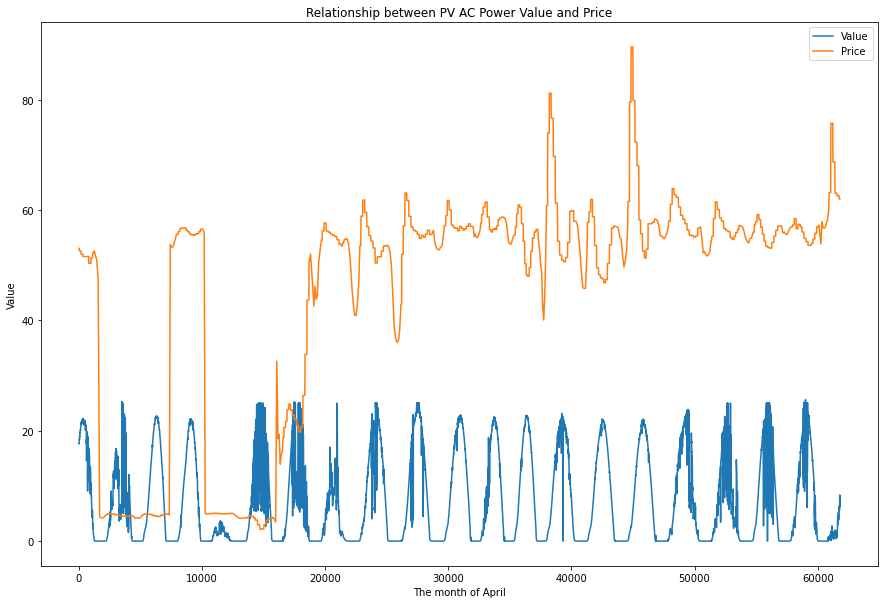

In [111]:
df_April_pv_ac.plot(kind='line', figsize=(15, 10))

plt.title('Relationship between PV AC Power Value and Price')
plt.ylabel('Value')
plt.xlabel('The month of April')

# syntax: plt.text(x, y, label)
plt.show() 

In [41]:
df_July_pv_ac = df_PV_AC[11169:22392]
df_July_pv_ac

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
61804,2020-07-15 05:38:00,PV_AC_Power.Value,REAL,0.314999,16.30,2020-07-15,05:38:00,Wednesday
61808,2020-07-15 05:41:00,PV_AC_Power.Value,REAL,0.422001,16.30,2020-07-15,05:41:00,Wednesday
61822,2020-07-15 05:48:00,PV_AC_Power.Value,REAL,0.522999,16.30,2020-07-15,05:48:00,Wednesday
61838,2020-07-15 05:58:00,PV_AC_Power.Value,REAL,0.418999,16.30,2020-07-15,05:58:00,Wednesday
61845,2020-07-15 06:04:00,PV_AC_Power.Value,REAL,0.519001,16.62,2020-07-15,06:04:00,Wednesday
...,...,...,...,...,...,...,...,...
115431,2020-07-31 20:59:00,PV_AC_Power.Value,REAL,0.291000,15.21,2020-07-31,20:59:00,Friday
115450,2020-07-31 21:12:00,PV_AC_Power.Value,REAL,0.187000,14.99,2020-07-31,21:12:00,Friday
115469,2020-07-31 21:22:00,PV_AC_Power.Value,REAL,0.083000,14.99,2020-07-31,21:22:00,Friday
115564,2020-07-31 22:22:00,PV_AC_Power.Value,REAL,0.000000,14.67,2020-07-31,22:22:00,Friday


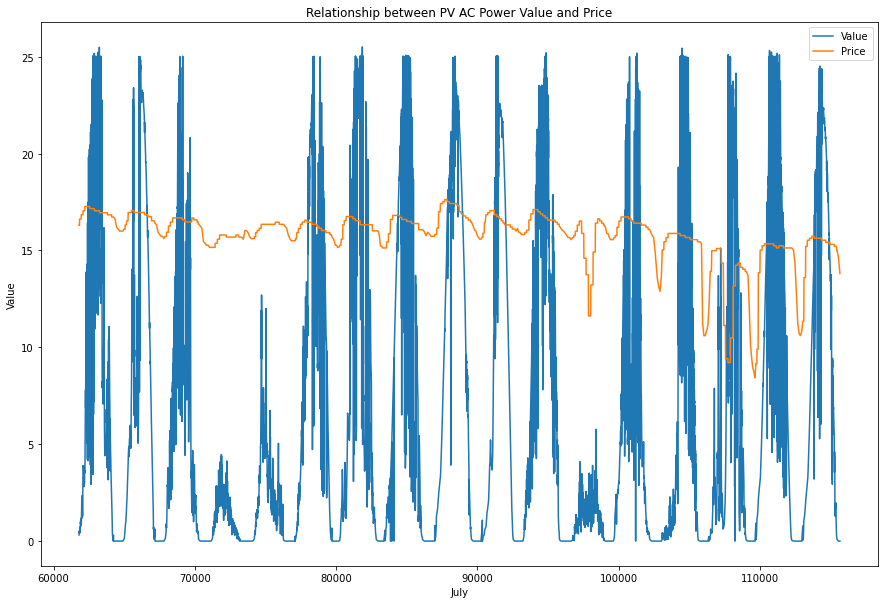

In [112]:
df_July_pv_ac.plot(kind='line', figsize=(15, 10))

plt.title('Relationship between PV AC Power Value and Price')
plt.ylabel('Value')
plt.xlabel('July')

# syntax: plt.text(x, y, label)
plt.show() 

In [43]:
df_aug_pv_ac = df_PV_AC[22392:164750]
df_aug_pv_ac

,LocalDateTime,Tagname,DataType,Value,Price,Dates,Time,weekday
115780,2020-08-01 00:22:00,PV_AC_Power.Value,REAL,0.000000,13.34,2020-08-01,00:22:00,Saturday
115889,2020-08-01 01:22:00,PV_AC_Power.Value,REAL,0.000000,12.59,2020-08-01,01:22:00,Saturday
116003,2020-08-01 02:22:00,PV_AC_Power.Value,REAL,0.000000,11.84,2020-08-01,02:22:00,Saturday
116117,2020-08-01 03:22:00,PV_AC_Power.Value,REAL,0.000000,11.30,2020-08-01,03:22:00,Saturday
116232,2020-08-01 04:22:00,PV_AC_Power.Value,REAL,0.000000,10.76,2020-08-01,04:22:00,Saturday
...,...,...,...,...,...,...,...,...
164738,2020-08-19 17:32:00,PV_AC_Power.Value,REAL,7.757999,46.02,2020-08-19,17:32:00,Wednesday
164741,2020-08-19 17:33:00,PV_AC_Power.Value,REAL,8.048000,46.02,2020-08-19,17:33:00,Wednesday
164744,2020-08-19 17:34:00,PV_AC_Power.Value,REAL,7.270000,46.02,2020-08-19,17:34:00,Wednesday
164747,2020-08-19 17:35:00,PV_AC_Power.Value,REAL,6.790001,46.02,2020-08-19,17:35:00,Wednesday


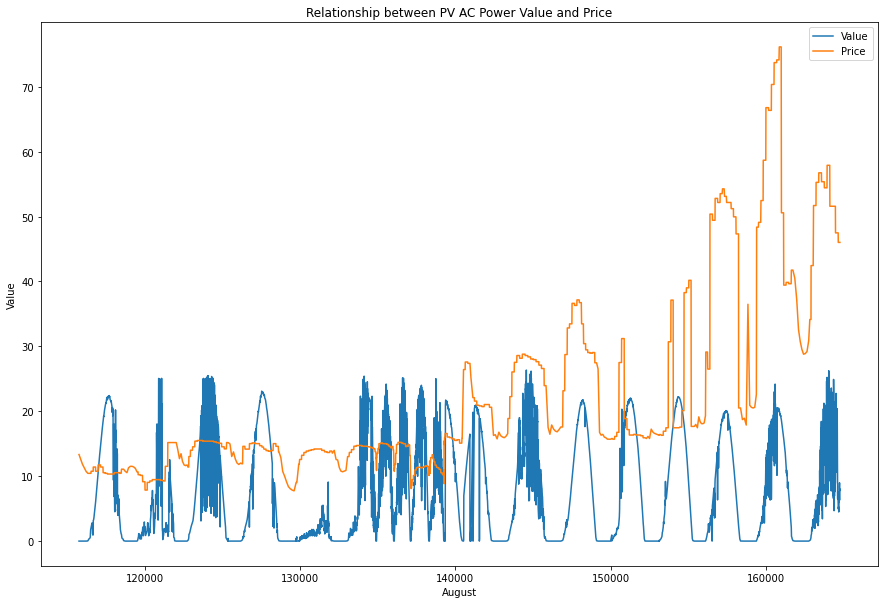

In [113]:
df_aug_pv_ac.plot(kind='line', figsize=(15, 10))

plt.title('Relationship between PV AC Power Value and Price')
plt.ylabel('Value')
plt.xlabel('August')

# syntax: plt.text(x, y, label)
plt.show() 

Now we will examine the battery dataframe and separate the three types of data into three dataframes

In [46]:
grouped = battery_df.groupby(battery_df.Tagname) 
df_GD_AC_battery = grouped.get_group("GD_AC_W_Sum.Value") 
df_GD_AC_battery 

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
2,2020-08-19 17:38:00,500,GD_AC_W_Sum.Value,REAL,41.373,2020-08-19,17:38:00,Wednesday
5,2020-08-19 17:39:00,550,GD_AC_W_Sum.Value,REAL,28.192,2020-08-19,17:39:00,Wednesday
8,2020-08-19 17:40:00,550,GD_AC_W_Sum.Value,REAL,30.304,2020-08-19,17:40:00,Wednesday
11,2020-08-19 17:41:00,500,GD_AC_W_Sum.Value,REAL,27.424,2020-08-19,17:41:00,Wednesday
14,2020-08-19 17:42:00,550,GD_AC_W_Sum.Value,REAL,39.136,2020-08-19,17:42:00,Wednesday
...,...,...,...,...,...,...,...,...
113549,2020-09-23 05:32:00,550,GD_AC_W_Sum.Value,REAL,18.560,2020-09-23,05:32:00,Wednesday
113551,2020-09-23 05:33:00,500,GD_AC_W_Sum.Value,REAL,20.960,2020-09-23,05:33:00,Wednesday
113552,2020-09-23 05:34:00,500,GD_AC_W_Sum.Value,REAL,20.352,2020-09-23,05:34:00,Wednesday
113554,2020-09-23 05:35:00,550,GD_AC_W_Sum.Value,REAL,30.912,2020-09-23,05:35:00,Wednesday


In [47]:
grouped = battery_df.groupby(battery_df.Tagname) 
df_PV_AC_battery = grouped.get_group("PV_AC_Power.Value") 
df_PV_AC_battery 

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
0,2020-08-19 17:37:00,500,PV_AC_Power.Value,REAL,6.255001,2020-08-19,17:37:00,Wednesday
3,2020-08-19 17:38:00,550,PV_AC_Power.Value,REAL,6.153999,2020-08-19,17:38:00,Wednesday
6,2020-08-19 17:39:00,550,PV_AC_Power.Value,REAL,5.881001,2020-08-19,17:39:00,Wednesday
9,2020-08-19 17:40:00,500,PV_AC_Power.Value,REAL,5.768002,2020-08-19,17:40:00,Wednesday
12,2020-08-19 17:41:00,550,PV_AC_Power.Value,REAL,5.986000,2020-08-19,17:41:00,Wednesday
...,...,...,...,...,...,...,...,...
113065,2020-09-23 01:15:00,550,PV_AC_Power.Value,REAL,0.000000,2020-09-23,01:15:00,Wednesday
113180,2020-09-23 02:15:00,550,PV_AC_Power.Value,REAL,0.000000,2020-09-23,02:15:00,Wednesday
113294,2020-09-23 03:15:00,500,PV_AC_Power.Value,REAL,0.000000,2020-09-23,03:15:00,Wednesday
113404,2020-09-23 04:15:00,500,PV_AC_Power.Value,REAL,0.000000,2020-09-23,04:15:00,Wednesday


In [48]:
grouped = battery_df.groupby(battery_df.Tagname) 
df_HMI_battery = grouped.get_group("HMI_Pcons") 
df_HMI_battery 

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
1,2020-08-19 17:38:00,500,HMI_Pcons,DINT,100.0,2020-08-19,17:38:00,Wednesday
4,2020-08-19 17:39:00,500,HMI_Pcons,DINT,72.0,2020-08-19,17:39:00,Wednesday
7,2020-08-19 17:40:00,500,HMI_Pcons,DINT,35.0,2020-08-19,17:40:00,Wednesday
10,2020-08-19 17:41:00,500,HMI_Pcons,DINT,48.0,2020-08-19,17:41:00,Wednesday
13,2020-08-19 17:42:00,550,HMI_Pcons,DINT,49.0,2020-08-19,17:42:00,Wednesday
...,...,...,...,...,...,...,...,...
113548,2020-09-23 05:31:00,550,HMI_Pcons,DINT,33.0,2020-09-23,05:31:00,Wednesday
113550,2020-09-23 05:32:00,550,HMI_Pcons,DINT,20.0,2020-09-23,05:32:00,Wednesday
113553,2020-09-23 05:34:00,550,HMI_Pcons,DINT,25.0,2020-09-23,05:34:00,Wednesday
113555,2020-09-23 05:35:00,550,HMI_Pcons,DINT,33.0,2020-09-23,05:35:00,Wednesday


We tried to plot the battery data 

<function matplotlib.pyplot.show(close=None, block=None)>

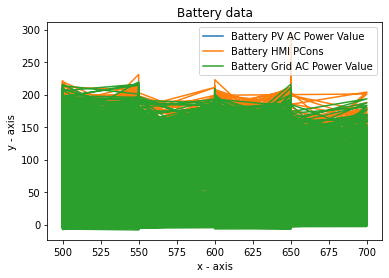

In [117]:
#line 1 plots
x1 = df_PV_AC_battery['Milliseconds']
y1 = df_PV_AC_battery['Value']
#plotting the line 1 points
plt.plot(x1, y1, label = 'Battery PV AC Power Value')
#line 2 plots
x2 = df_HMI_battery['Milliseconds']
y2 = df_HMI_battery['Value']
plt.plot(x2, y2, label = 'Battery HMI PCons')
#line 3 plots
x3 = df_GD_AC_battery['Milliseconds']
y3 = df_GD_AC_battery['Value']
plt.plot(x3, y3, label = 'Battery Grid AC Power Value')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Battery data')
plt.legend()
plt.show

In [51]:
df_aug_battery_pv_ac = df_PV_AC_battery[0:7208]
df_aug_battery_pv_ac

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
0,2020-08-19 17:37:00,500,PV_AC_Power.Value,REAL,6.255001,2020-08-19,17:37:00,Wednesday
3,2020-08-19 17:38:00,550,PV_AC_Power.Value,REAL,6.153999,2020-08-19,17:38:00,Wednesday
6,2020-08-19 17:39:00,550,PV_AC_Power.Value,REAL,5.881001,2020-08-19,17:39:00,Wednesday
9,2020-08-19 17:40:00,500,PV_AC_Power.Value,REAL,5.768002,2020-08-19,17:40:00,Wednesday
12,2020-08-19 17:41:00,550,PV_AC_Power.Value,REAL,5.986000,2020-08-19,17:41:00,Wednesday
...,...,...,...,...,...,...,...,...
39768,2020-08-31 20:05:00,600,PV_AC_Power.Value,REAL,0.136002,2020-08-31,20:05:00,Monday
39785,2020-08-31 20:13:00,600,PV_AC_Power.Value,REAL,0.026001,2020-08-31,20:13:00,Monday
39907,2020-08-31 21:13:00,600,PV_AC_Power.Value,REAL,0.000000,2020-08-31,21:13:00,Monday
40030,2020-08-31 22:13:00,650,PV_AC_Power.Value,REAL,0.000000,2020-08-31,22:13:00,Monday


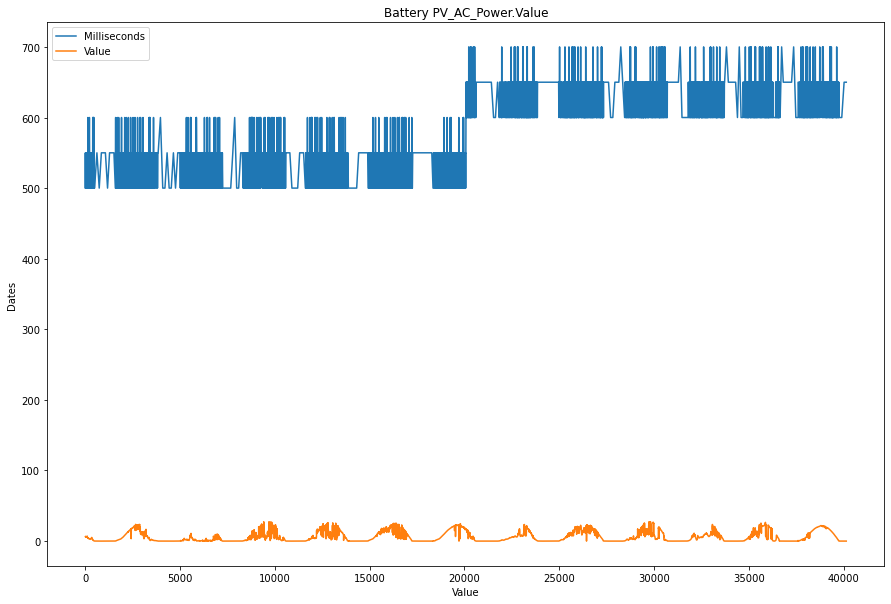

In [52]:
df_aug_battery_pv_ac.plot(kind='line', figsize=(15, 10))

plt.title('Battery PV_AC_Power.Value')
plt.ylabel('Dates')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

In [53]:
df_sep_battery_pv_ac = df_PV_AC_battery[7208:113518]
df_sep_battery_pv_ac

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
40252,2020-09-01 00:13:00,600,PV_AC_Power.Value,REAL,0.0,2020-09-01,00:13:00,Tuesday
40361,2020-09-01 01:13:00,600,PV_AC_Power.Value,REAL,0.0,2020-09-01,01:13:00,Tuesday
40474,2020-09-01 02:13:00,650,PV_AC_Power.Value,REAL,0.0,2020-09-01,02:13:00,Tuesday
40576,2020-09-01 03:13:00,650,PV_AC_Power.Value,REAL,0.0,2020-09-01,03:13:00,Tuesday
40691,2020-09-01 04:13:00,600,PV_AC_Power.Value,REAL,0.0,2020-09-01,04:13:00,Tuesday
...,...,...,...,...,...,...,...,...
113065,2020-09-23 01:15:00,550,PV_AC_Power.Value,REAL,0.0,2020-09-23,01:15:00,Wednesday
113180,2020-09-23 02:15:00,550,PV_AC_Power.Value,REAL,0.0,2020-09-23,02:15:00,Wednesday
113294,2020-09-23 03:15:00,500,PV_AC_Power.Value,REAL,0.0,2020-09-23,03:15:00,Wednesday
113404,2020-09-23 04:15:00,500,PV_AC_Power.Value,REAL,0.0,2020-09-23,04:15:00,Wednesday


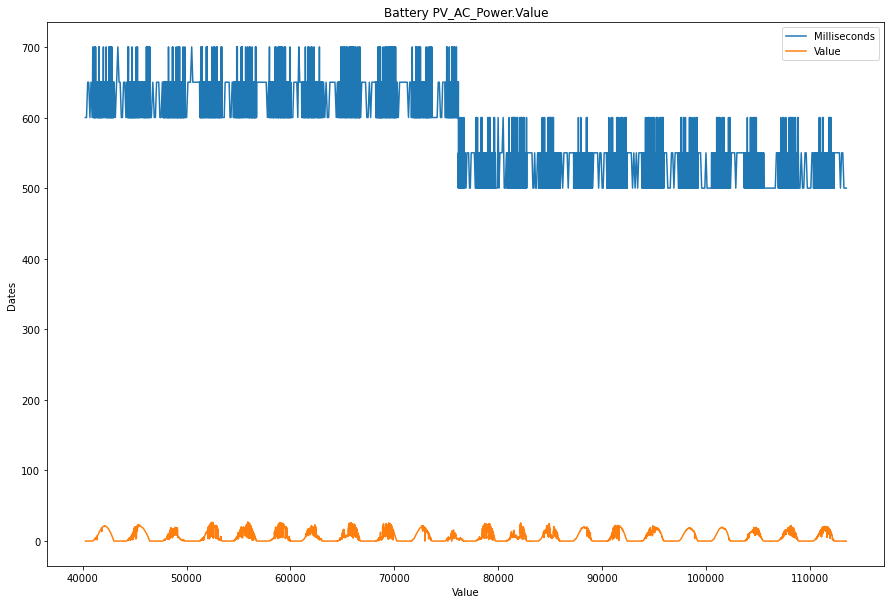

In [54]:
df_sep_battery_pv_ac.plot(kind='line', figsize=(15, 10))

plt.title('Battery PV_AC_Power.Value')
plt.ylabel('Dates')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

In [55]:
df_aug_battery_HMI = df_HMI_battery [0:15288]
df_aug_battery_HMI

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
1,2020-08-19 17:38:00,500,HMI_Pcons,DINT,100.0,2020-08-19,17:38:00,Wednesday
4,2020-08-19 17:39:00,500,HMI_Pcons,DINT,72.0,2020-08-19,17:39:00,Wednesday
7,2020-08-19 17:40:00,500,HMI_Pcons,DINT,35.0,2020-08-19,17:40:00,Wednesday
10,2020-08-19 17:41:00,500,HMI_Pcons,DINT,48.0,2020-08-19,17:41:00,Wednesday
13,2020-08-19 17:42:00,550,HMI_Pcons,DINT,49.0,2020-08-19,17:42:00,Wednesday
...,...,...,...,...,...,...,...,...
40217,2020-08-31 23:55:00,650,HMI_Pcons,DINT,28.0,2020-08-31,23:55:00,Monday
40219,2020-08-31 23:56:00,600,HMI_Pcons,DINT,19.0,2020-08-31,23:56:00,Monday
40221,2020-08-31 23:57:00,600,HMI_Pcons,DINT,18.0,2020-08-31,23:57:00,Monday
40223,2020-08-31 23:58:00,650,HMI_Pcons,DINT,29.0,2020-08-31,23:58:00,Monday


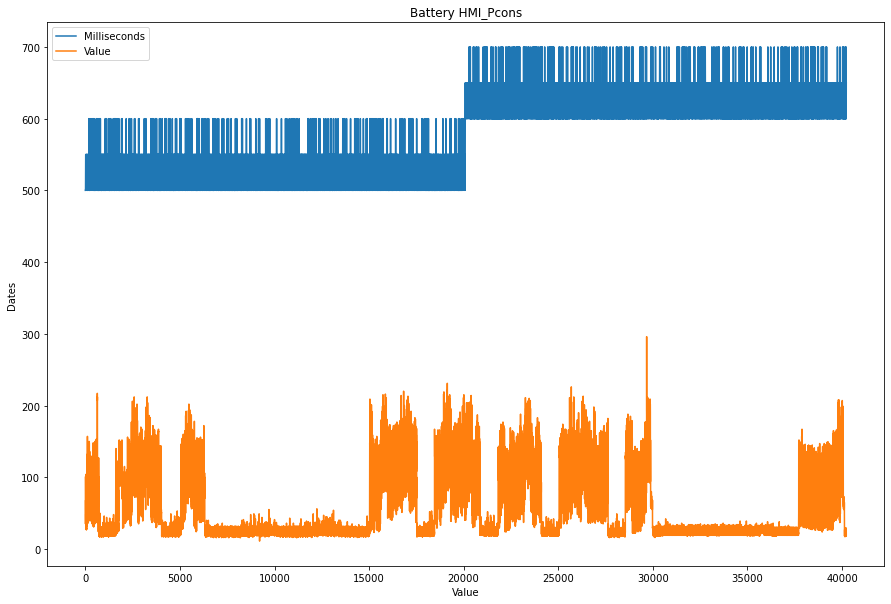

In [56]:
df_aug_battery_HMI.plot(kind='line', figsize=(15, 10))

plt.title('Battery HMI_Pcons')
plt.ylabel('Dates')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

In [57]:
df_sep_battery_HMI = df_HMI_battery[15288:113557]
df_sep_battery_HMI

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
40227,2020-09-01 00:00:00,600,HMI_Pcons,DINT,19.0,2020-09-01,00:00:00,Tuesday
40230,2020-09-01 00:02:00,600,HMI_Pcons,DINT,20.0,2020-09-01,00:02:00,Tuesday
40232,2020-09-01 00:03:00,600,HMI_Pcons,DINT,19.0,2020-09-01,00:03:00,Tuesday
40234,2020-09-01 00:04:00,650,HMI_Pcons,DINT,17.0,2020-09-01,00:04:00,Tuesday
40236,2020-09-01 00:05:00,650,HMI_Pcons,DINT,20.0,2020-09-01,00:05:00,Tuesday
...,...,...,...,...,...,...,...,...
113548,2020-09-23 05:31:00,550,HMI_Pcons,DINT,33.0,2020-09-23,05:31:00,Wednesday
113550,2020-09-23 05:32:00,550,HMI_Pcons,DINT,20.0,2020-09-23,05:32:00,Wednesday
113553,2020-09-23 05:34:00,550,HMI_Pcons,DINT,25.0,2020-09-23,05:34:00,Wednesday
113555,2020-09-23 05:35:00,550,HMI_Pcons,DINT,33.0,2020-09-23,05:35:00,Wednesday


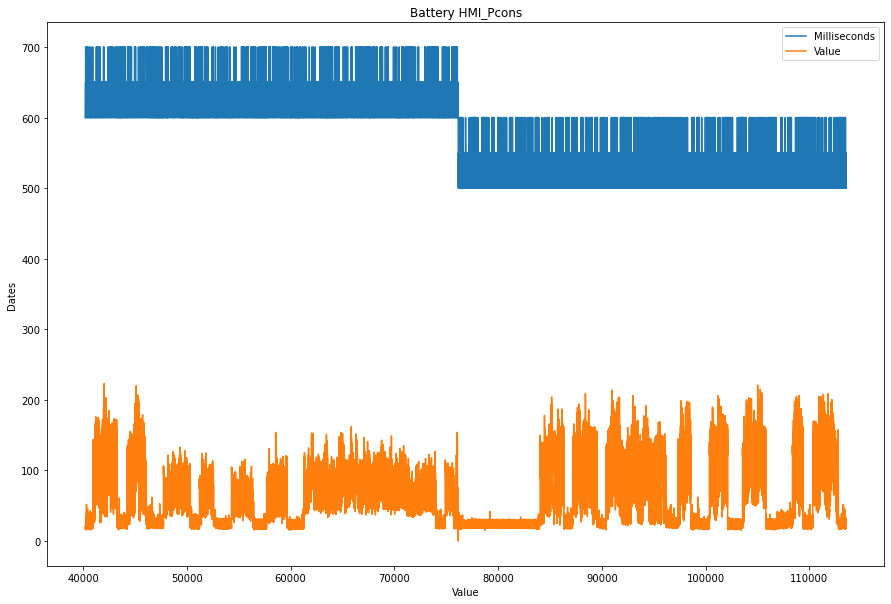

In [58]:
df_sep_battery_HMI.plot(kind='line', figsize=(15, 10))

plt.title('Battery HMI_Pcons')
plt.ylabel('Dates')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

In [59]:
df_aug_GD_AC_battery = df_GD_AC_battery .iloc[0:17082]
df_aug_GD_AC_battery 

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
2,2020-08-19 17:38:00,500,GD_AC_W_Sum.Value,REAL,41.373,2020-08-19,17:38:00,Wednesday
5,2020-08-19 17:39:00,550,GD_AC_W_Sum.Value,REAL,28.192,2020-08-19,17:39:00,Wednesday
8,2020-08-19 17:40:00,550,GD_AC_W_Sum.Value,REAL,30.304,2020-08-19,17:40:00,Wednesday
11,2020-08-19 17:41:00,500,GD_AC_W_Sum.Value,REAL,27.424,2020-08-19,17:41:00,Wednesday
14,2020-08-19 17:42:00,550,GD_AC_W_Sum.Value,REAL,39.136,2020-08-19,17:42:00,Wednesday
...,...,...,...,...,...,...,...,...
40216,2020-08-31 23:55:00,650,GD_AC_W_Sum.Value,REAL,32.064,2020-08-31,23:55:00,Monday
40218,2020-08-31 23:56:00,650,GD_AC_W_Sum.Value,REAL,21.376,2020-08-31,23:56:00,Monday
40220,2020-08-31 23:57:00,650,GD_AC_W_Sum.Value,REAL,18.944,2020-08-31,23:57:00,Monday
40222,2020-08-31 23:58:00,650,GD_AC_W_Sum.Value,REAL,28.544,2020-08-31,23:58:00,Monday


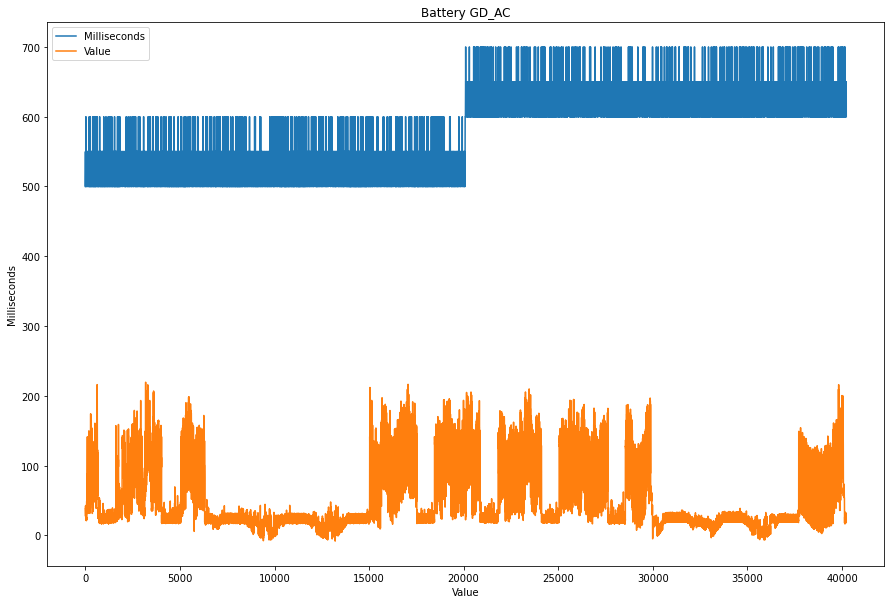

In [60]:
df_aug_GD_AC_battery.plot(kind='line', figsize=(15, 10))

plt.title('Battery GD_AC')
plt.ylabel('Milliseconds')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

In [61]:
df_sep_GD_AC_battery = df_GD_AC_battery.iloc[17082:113556]
df_sep_GD_AC_battery 

,LocalDateTime,Milliseconds,Tagname,DataType,Value,Dates,Time,weekday
40226,2020-09-01 00:00:00,600,GD_AC_W_Sum.Value,REAL,19.200,2020-09-01,00:00:00,Tuesday
40228,2020-09-01 00:01:00,600,GD_AC_W_Sum.Value,REAL,19.008,2020-09-01,00:01:00,Tuesday
40229,2020-09-01 00:02:00,600,GD_AC_W_Sum.Value,REAL,18.880,2020-09-01,00:02:00,Tuesday
40231,2020-09-01 00:03:00,650,GD_AC_W_Sum.Value,REAL,18.720,2020-09-01,00:03:00,Tuesday
40233,2020-09-01 00:04:00,650,GD_AC_W_Sum.Value,REAL,16.960,2020-09-01,00:04:00,Tuesday
...,...,...,...,...,...,...,...,...
113549,2020-09-23 05:32:00,550,GD_AC_W_Sum.Value,REAL,18.560,2020-09-23,05:32:00,Wednesday
113551,2020-09-23 05:33:00,500,GD_AC_W_Sum.Value,REAL,20.960,2020-09-23,05:33:00,Wednesday
113552,2020-09-23 05:34:00,500,GD_AC_W_Sum.Value,REAL,20.352,2020-09-23,05:34:00,Wednesday
113554,2020-09-23 05:35:00,550,GD_AC_W_Sum.Value,REAL,30.912,2020-09-23,05:35:00,Wednesday


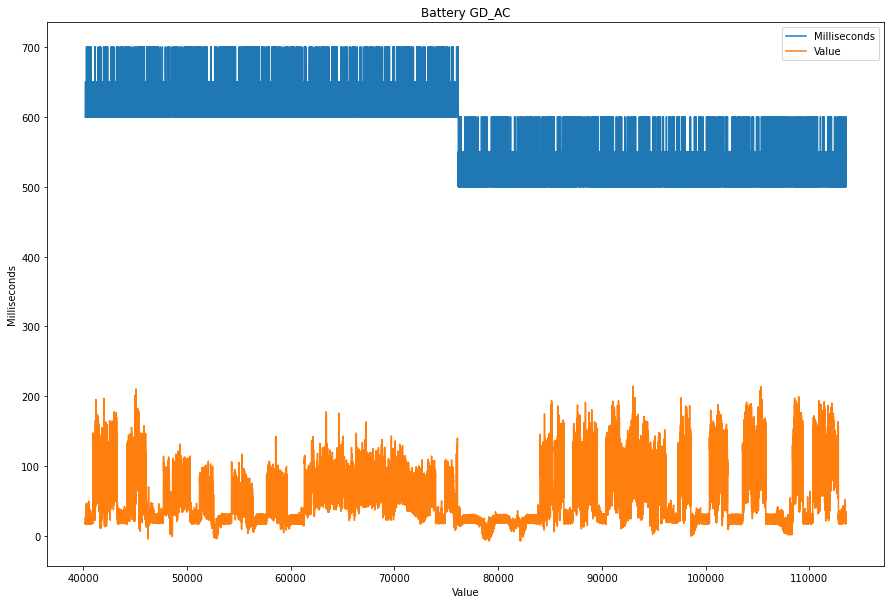

In [62]:
df_sep_GD_AC_battery.plot(kind='line', figsize=(15, 10))

plt.title('Battery GD_AC')
plt.ylabel('Milliseconds')
plt.xlabel('Value')

# syntax: plt.text(x, y, label)
plt.show() 

After exploring and analyzing the data, we used the AutoRegressive Integrated Moving Average (ARIMA) model for forecasting the price which we will later use for optimization of cost. ARIMA models can be applied on stationary data so we will have to see if this data is stationary

In [118]:
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import datetime as dt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from scipy.stats import sem, t
from scipy import mean
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import arma_generate_sample
import itertools
import warnings

In [119]:
variables = pd.read_csv('price.csv')
price = variables['Price']
price

0         53.03
1         53.03
2         53.03
3         53.03
4         53.03
          ...  
164748    46.02
164749    46.02
164750    46.02
164751    46.02
164752    46.02
Name: Price, Length: 164753, dtype: float64

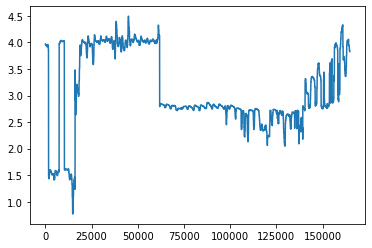

In [65]:
Inprice=np.log(price)
Inprice
plt.plot(Inprice)
plt.show()

We will now do the Dickey–Fuller test to check if the data is stationary

In [84]:
def stat_test():
    df1 = price_df.loc[:10000, 'Price']
    X = df1.values
    print(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
   

ADF Statistic: -1.272510
p-value: 0.641653
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The test result (p-value) shows that it is not so we will transform it to a stationary dataset

0        53.03
1        53.03
2        53.03
3        53.03
4        53.03
         ...  
9996     56.52
9997     56.52
9998     56.52
9999     56.52
10000    56.52
Name: Price, Length: 10001, dtype: float64


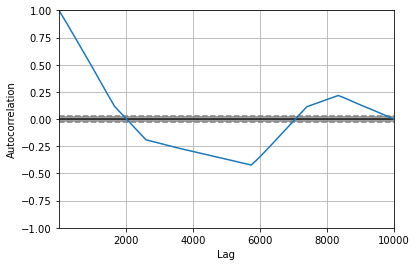

In [93]:
def auto_corr():
    corr_data = price_df.loc[:10000, 'Price']
    corr_data = corr_data.replace(np.nan, 0)
print(corr_data)
autocorrelation_plot(corr_data)
plt.show()

C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


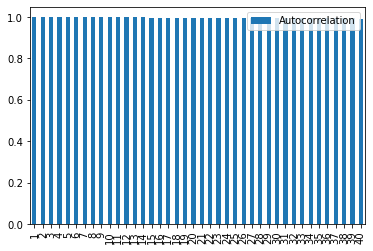

In [66]:
acf_1 = acf(Inprice)[1:100000]
test_price_df = pd.DataFrame([acf_1]).T
test_price_df.columns = ['Autocorrelation']
test_price_df.index+= 1
test_price_df.plot(kind='bar')
plt.show()

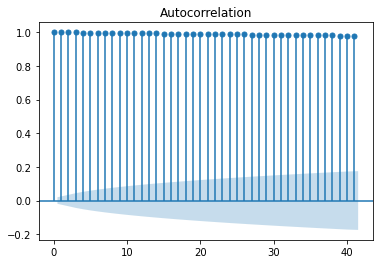

In [97]:
def pacf():
    pacf_data = price_df.loc[:10000, 'Price']
    pacf_data = pacf_data.replace(np.nan, 0)
plot_acf(pacf_data)
plt.show()
    

C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


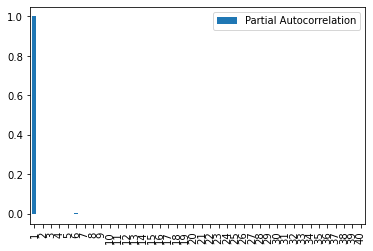

In [67]:
pacf_1 = pacf(Inprice)[1:100000]
test_price_df = pd.DataFrame([pacf_1]).T
test_price_df.columns = ['Partial Autocorrelation']
test_price_df.index+= 1
test_price_df.plot(kind='bar')
plt.show()

C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


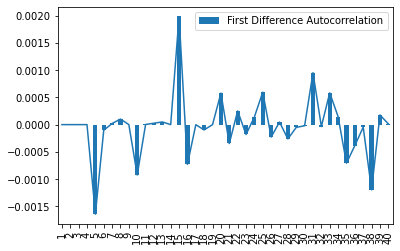

In [68]:
result = ts.adfuller(Inprice, 1)
result
Inprice_diff=Inprice-Inprice.shift()
diff=Inprice_diff.dropna()
acf_1_diff = acf(diff)[1:100000]
test_price_df = pd.DataFrame([acf_1_diff]).T
test_price_df.columns = ['First Difference Autocorrelation']
test_price_df.index+= 1
test_price_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:100000]
plt.plot(pacf_1_diff)
plt.show()

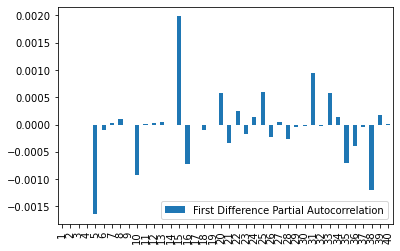

In [69]:
test_price_df = pd.DataFrame([pacf_1_diff]).T
test_price_df.columns = ['First Difference Partial Autocorrelation']
test_price_df.index+= 1
test_price_df.plot(kind='bar')
plt.show()

After obtaining the autocorrelation data above, we can now run the ARIMA model again to predict the price

C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:               164752
Model:                 ARIMA(1, 1, 0)   Log Likelihood              463310.028
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 03 Mar 2021   AIC                        -926614.056
Time:                        20:16:57   BIC                        -926584.020
Sample:                             1   HQIC                       -926605.141
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.614e-07   3.58e-05     -0.024      0.981   -7.11e-05    6.93e-05
ar.L1.D.Price -3.505e-09      0.002  -1.42e-06      1.000      -0.005       0.005
                                    Root

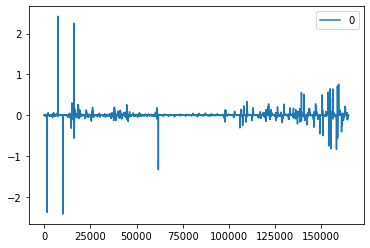

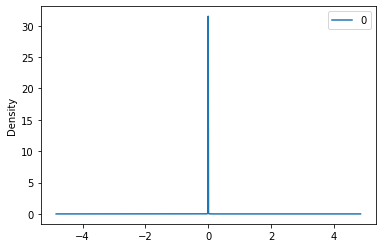

                  0
count  1.647520e+05
mean   8.612774e-10
std    1.453637e-02
min   -2.419249e+00
25%    8.614378e-07
50%    8.614378e-07
75%    8.614378e-07
max    2.423352e+00


In [72]:
model = ARIMA(Inprice, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\Basim\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:               164752
Model:                 ARIMA(2, 1, 0)   Log Likelihood              463310.028
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 03 Mar 2021   AIC                        -926612.056
Time:                        20:14:58   BIC                        -926572.007
Sample:                             1   HQIC                       -926600.169
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.612e-07   3.58e-05     -0.024      0.981   -7.11e-05    6.93e-05
ar.L1.D.Price -3.505e-09      0.002  -1.42e-06      1.000      -0.005       0.005
ar.L2.D.Price -3.505e-09      0.002  -1.

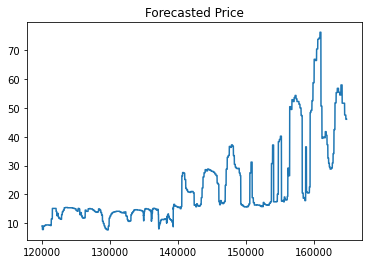

In [70]:
model = ARIMA(Inprice, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(120000, 164753, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Price')
plt.show()

In [71]:
conda install -c conda-forge pyomo

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install pyomo

Note: you may need to restart the kernel to use updated packages.


In [74]:
 from pyomo.environ import*

Pyomo is an open-source library used to handle optimization problems by declaring parameters and variables included in the model. 
In order to develop an algorithm for cost optimization as well as optimal battery utilization, we propose the following (but have not had the chance to code it in python in this notebook):

1. Reduce value of electricity obtained from the grid (GD_AC_W_Sum.Value)
2. Ensure that after one peak of 200kW, spot energy costs are minimized based on our forecasted price from the ARIMA model
3. Peak shaving by obtaining energy from the solar PV (PV_AC_Power.Value) and the battery (PV_AC_Power.Value from battery_df), depending on the predicted sunshine level
4. When the price of electricity is low (forecasted price drops), the battery should be charged 

Looking forward to guidance from Diggit on how this analysis can be improved and a relevant algorithm be developed